In [1]:
f_kntrap_cat  = 'KNTRAP1.220213.1079991_ooi_i_v1_S29.dcmp'
f_kntrap_cat_header = 'KNTRAP1.220213.1079991_ooi_i_v1_S29.fits'
f_absphot_cat = 'KNTRAP1.220213.1079991_ooi_i_v1_S29.abscats.ap'
f_SMg = 'KNTRAP1_g_1_SM_phot.cat'
f_SMi = 'KNTRAP1_i_1_SM_phot.cat'

In [2]:
import astropy.io.ascii as ascii
import pandas as pd
import astropy.io.fits as fits
import matplotlib.pyplot as plt
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord

Conclusion:
No idea why this breaks and throws the error "ERROR: Doesn't seem that any of the catalogue stars are on the chip! check your catalogue!". 
The input catalogs ARE on this CCD. 

# What's this dcmp file -plot dcmp and abscat ra,dec

In [33]:
d_dcmp = ascii.read(f_kntrap_cat)
d_i = ascii.read(f_SMi)
_,h = fits.getdata(f_kntrap_cat_header,header=True)
w = WCS(h)
ra_SM, dec_SM    = (d_i['ra'],d_i['dec'])
x_kn, y_kn       = (d_dcmp['col1'],d_dcmp['col2'])
c                = w.pixel_to_world(x_kn,y_kn)
ra_kn, dec_kn    = (c.ra.degree,c.dec.degree)

(-49.35, -49.25)

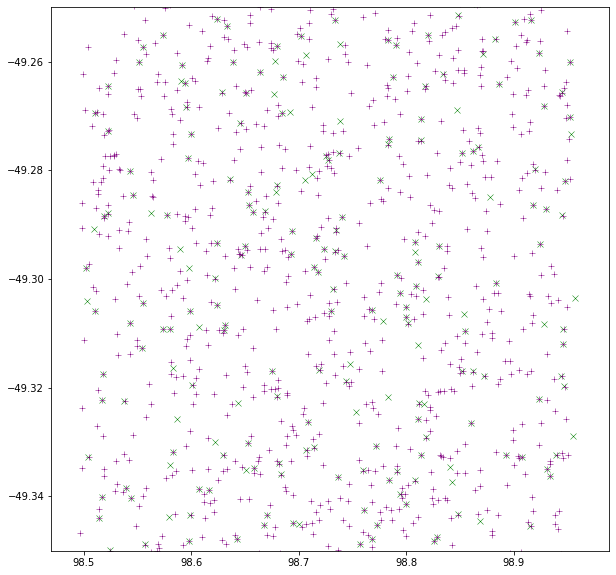

In [36]:
plt.figure(figsize=(10,10))
plt.scatter(ra_SM, dec_SM,marker='x',color='g',linewidth=0.5)
plt.scatter(ra_kn, dec_kn,marker='+',color='purple',linewidth=0.5)
plt.ylim(-49.35,-49.25)

# What's this dcmp file -plot dcmp and abscat x,y

In [12]:
d_dcmp = ascii.read(f_kntrap_cat)
d_i = ascii.read(f_SMi)
_,h = fits.getdata(f_kntrap_cat_header,header=True)
w = WCS(h)
x_kn,y_kn=(d_dcmp['col1'],d_dcmp['col2'])
c = SkyCoord(d_i['ra'],d_i['dec'], frame='icrs', unit='deg')
x_SM,y_SM=w.world_to_pixel(c)

(0, 2000)

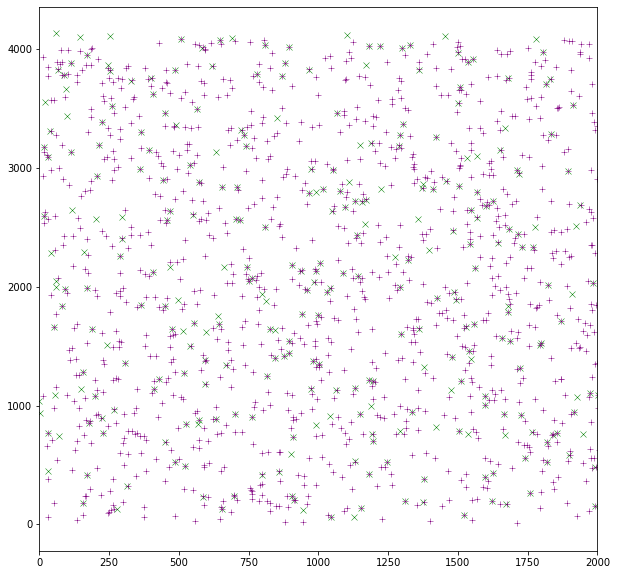

In [18]:
plt.figure(figsize=(10,10))
plt.scatter(x_SM,y_SM,marker='x',color='g',linewidth=0.5)
plt.scatter(x_kn,y_kn,marker='+',color='purple',linewidth=0.5)
plt.xlim(0,2000)

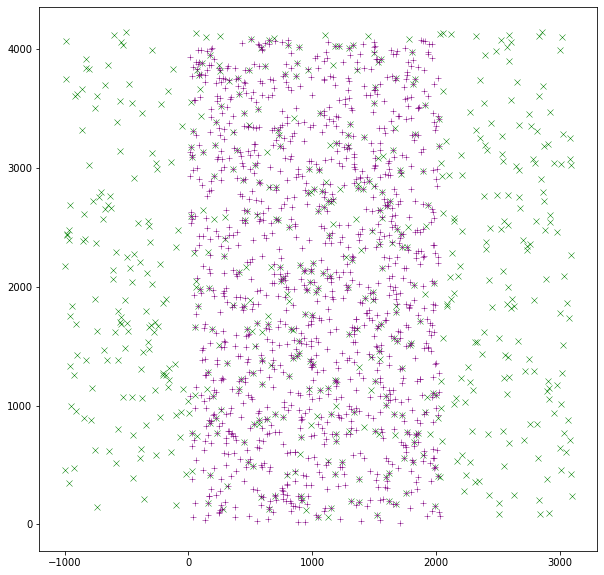

In [15]:
plt.figure(figsize=(10,10))
plt.scatter(x_SM,y_SM,marker='x',color='g',linewidth=0.5)
plt.scatter(x_kn,y_kn,marker='+',color='purple',linewidth=0.5)

# The abscats are fine and matched

In [20]:
d_g = ascii.read(f_SMg)
d_i = ascii.read(f_SMi)

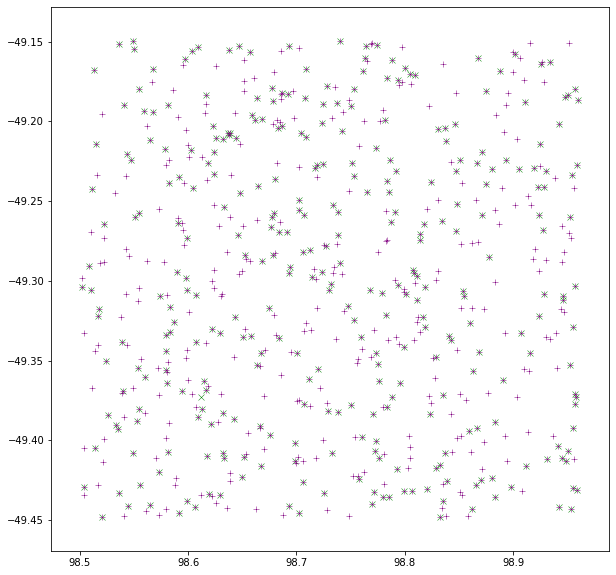

In [36]:
plt.figure(figsize=(10,10))
plt.scatter(d_g['ra'],d_g['dec'],marker='x',color='g',linewidth=0.5)
plt.scatter(d_i['ra'],d_i['dec'],marker='+',color='purple',linewidth=0.5)